<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/titanic_train.csv")
df.head()
print("Shape:", df.shape)
print("Data Types: ")
df.dtypes

Shape: (891, 12)
Data Types: 


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [3]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df['Sex'].value_counts()
df['Sex'] = np.where(df.Sex == 'male', 1, 0)
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [6]:
ordinal_label = {k: i for i, k in enumerate(df['Embarked'].unique(), 0)}
df['Embarked'] = df['Embarked'].map(ordinal_label)
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
#removing non-numeric datatypes
df.drop(labels=['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [8]:
print(df.dtypes)
df.isna().sum()

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [9]:
constant_features = [
    features for features in df.columns if df[features].std() == 0
]
print(f"Number of constant features: {len(constant_features)}")

Number of constant features: 0


In [10]:
quasi_constant_features = []
for feature in df.columns:
    predominant = (df[feature].value_counts() / len(df)).sort_values(ascending=False).values[0]
    if predominant > 0.9:
        quasi_constant_features.append(feature)

print(f"Number of Quasi Constant Features: {len(quasi_constant_features)}")

Number of Quasi Constant Features: 0


In [11]:
duplicated_feat = []

for i in range(len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]:
        if df[col_1].equals(df[col_2]):
            duplicated_feat.append(col_2)

print("Duplicated features:", duplicated_feat)

Duplicated features: []


Statistical Methods

<Axes: >

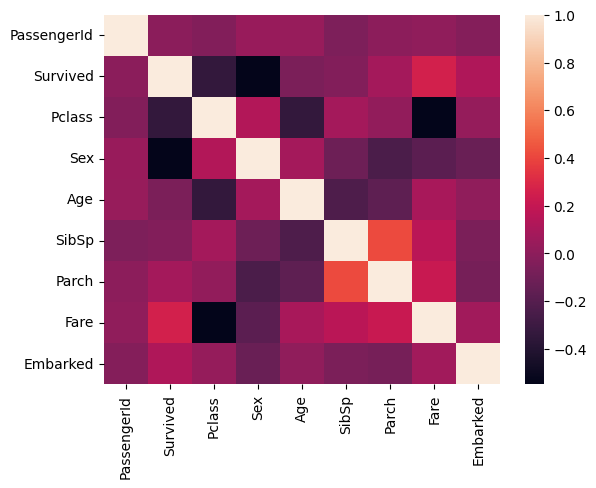

In [12]:
corrmat = df.corr()
sns.heatmap(corrmat)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                colname = matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.9)
correlated = set(corr_features)
correlated

set()

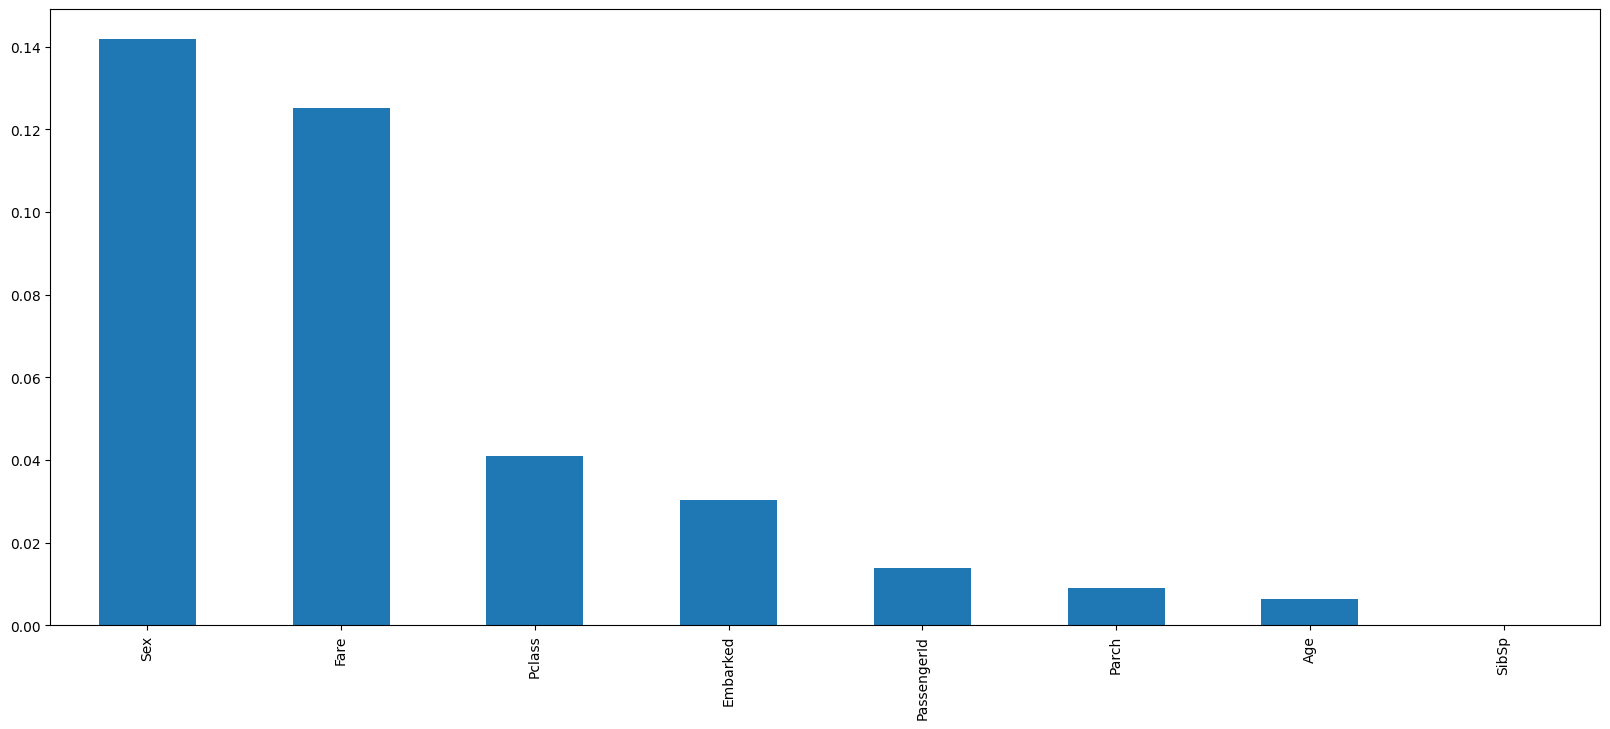

In [14]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(labels='Survived', axis=1)
y = df['Survived']
mi = mutual_info_classif(X.fillna(0), y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

In [15]:
selected_features = mi[mi > 0.0001].index.tolist()
print(f"Number of Selected Features: {len(selected_features)}")
print(f"Selected Features: {(selected_features)}")
X = X[selected_features]
print(X)

Number of Selected Features: 7
Selected Features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
     PassengerId  Pclass  Sex   Age  Parch     Fare  Embarked
0              1       3    1  22.0      0   7.2500         0
1              2       1    0  38.0      0  71.2833         1
2              3       3    0  26.0      0   7.9250         0
3              4       1    0  35.0      0  53.1000         0
4              5       3    1  35.0      0   8.0500         0
..           ...     ...  ...   ...    ...      ...       ...
886          887       2    1  27.0      0  13.0000         0
887          888       1    0  19.0      0  30.0000         0
888          889       3    0  28.0      2  23.4500         0
889          890       1    1  26.0      0  30.0000         1
890          891       3    1  32.0      0   7.7500         2

[891 rows x 7 columns]


In [16]:
from sklearn.feature_selection import chi2
f_score = chi2(X, y)
f_score
p_values = pd.Series(f_score[1])
p_values.index = X.columns
p_values.sort_values(ascending = True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03
PassengerId,6.873667e-02


In [17]:
p_values[p_values < 0.05].sort_values(ascending=True)

,0
Fare,0.000000e+00
Sex,6.077838e-22
Pclass,2.753786e-08
Age,3.273528e-06
Embarked,1.711228e-04
Parch,1.484707e-03


F-scores: [2.22848123e-02 1.15031272e+02 3.72405724e+02 3.76152805e+00
 5.96346384e+00 6.30307642e+01 1.25588673e+01]
p-values: [8.81365777e-01 2.53704739e-25 1.40606613e-69 5.27606885e-02
 1.47992454e-02 6.12018934e-15 4.14874835e-04]


,0
Sex,1.406066e-69
Pclass,2.537047e-25
Fare,6.120189e-15
Embarked,4.148748e-04
Parch,1.479925e-02
Age,5.276069e-02
PassengerId,8.813658e-01


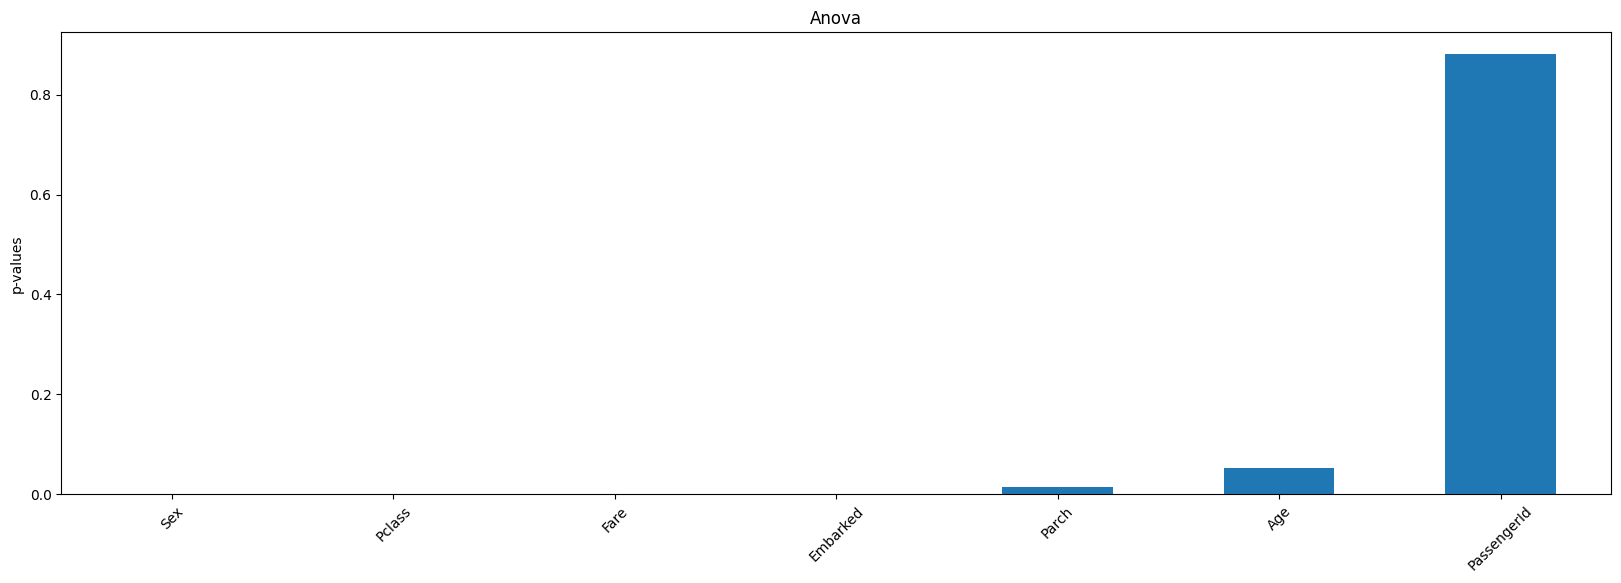

In [18]:
from sklearn.feature_selection import f_classif
f_score, p_value = f_classif(X, y)
print("F-scores:", f_score)
print("p-values:", p_value)
p_values = pd.Series(p_value)
p_values.index = X.columns
p_values.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")
p_values.sort_values(ascending=True)

In [19]:
p_values[p_values > 0.05]

,0
PassengerId,0.881366
Age,0.052761


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

roc_values = []
for feature in X.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X[feature].fillna(0).to_frame(), y)
    y_scored = clf.predict_proba(X[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y, y_scored[:, 1]))

roc_values = pd.Series(roc_values)
roc_values.index = X.columns
roc_values.sort_values(ascending=False)
roc_values[roc_values > 0.5]

,0
PassengerId,1.000000
Pclass,0.681417
Sex,0.766873
Age,0.691441
Parch,0.577248
Fare,0.896731
Embarked,0.577935


Wrapper Methods

In [21]:
#forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs1 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=True,
    floating=False,
    verbose=2,
    scoring='roc_auc',
    cv=3
)
sfs1 = sfs1.fit(np.array(X.fillna(0)), y)
selected_feature_names = [X.columns[i] for i in sfs1.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.4s finished

[2025-08-21 18:19:28] Features: 1/7 -- score: 0.7668727830505224[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.5s finished

[2025-08-21 18:19:34] Features: 2/7 -- score: 0.8286917201930143[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished

[2025-08-21 18:19:38] Features: 3/7 -- score: 0.8432157351484357[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s finished

[2025-08-21 18:19:42] Features: 4/7 -- score: 0.8371361007254018[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished

[2025-08-21 18:19:45] Features: 5/7 -- score: 0.8239542389671811[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s finished

[2025-08-21 18:19:47] Features: 6/7 -- score: 0.8438149106829004

Best accuracy score: 0.85
Best subset (indices): (0, 1, 2, 3, 4, 5, 6)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished

[2025-08-21 18:19:48] Features: 7/7 -- score: 0.8503419295050011

In [22]:
#backward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import  RandomForestClassifier
print(X.columns)
sfs2 = SFS(
    RandomForestClassifier(n_jobs=4),
    k_features=7,
    forward=False,
    floating=False,
    verbose=3,
    scoring='accuracy',
    cv=3
)
sfs2 = sfs2.fit(np.array(X.fillna(0)), y)
selected_feature_names = [X.columns[i] for i in sfs2.k_feature_idx_]

# Print the best accuracy score, indices, and feature names
print('Best accuracy score: %.2f' % sfs2.k_score_)
print('Best subset (indices):', sfs2.k_feature_idx_)
print('Best subset (corresponding names):', selected_feature_names)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')
Best accuracy score: 0.80
Best subset (indices): (0, 1, 2, 3, 4, 5, 6)
Best subset (corresponding names): ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']


In [24]:
#exhaustive search
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(
    RandomForestClassifier(n_jobs=4),
    min_features=1,
    max_features=X.shape[1],
    scoring='roc_auc',
    print_progress=True,
    cv=3
)

efs = efs.fit(np.array(X.fillna(0)), y)
print("Exhaustive Best Features:", efs.best_idx_)
print("Exhaustive Best Subset:", efs.best_feature_names_)


Features: 127/127

Exhaustive Best Features: (0, 1, 2, 3, 5, 6)
Exhaustive Best Subset: ('0', '1', '2', '3', '5', '6')


In [25]:
#RFE
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestClassifier(n_jobs=4), n_features_to_select=7)
rfe = rfe.fit(np.array(X.fillna(0)), y)

print("RFE Selected Features:", X.columns[rfe.support_].tolist())
print("Feature Ranking:", rfe.ranking_)


RFE Selected Features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
Feature Ranking: [1 1 1 1 1 1 1]
